In [43]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics # contains classification_report, confusion_matrix

In [44]:
# load dataset
diabetes = pd.read_csv("diabetes.csv")

# print dimensions
print("There are %s observations and %s variables." % diabetes.shape)

# check for missing values
print("NaNs in data frame.\n") if diabetes.isnull().values.any() else print("No missing values.\n")

# print head
print(diabetes.head())

There are 768 observations and 9 variables.
No missing values.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [45]:
# split data into features/inputs and targets/outputs
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = diabetes[feature_cols] # features
y_col= ['Outcome']
y = diabetes[y_col] # target variable

In [46]:
# split data into training and validation datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [47]:
# create model and train it
model = LogisticRegression()

In [48]:
# fitting the model
model.fit(X_train, y_train)

c:\Users\venkatesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\venkatesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# an elecgant one line model creation and fitting can be done as follows: 
model = LogisticRegression().fit(X_train, y_train)

c:\Users\venkatesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\venkatesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print("The intercept is %.3f" % model.intercept_)
print("The model coefficients are:")
for i,j in zip(feature_cols, model.coef_.reshape(-1,1)):
    print("\t %s %.4f" % (i,j))

The intercept is -7.909
The model coefficients are:
	 Pregnancies 0.1140
	 Insulin -0.0015
	 BMI 0.0863
	 Age 0.0131
	 Glucose 0.0344
	 BloodPressure -0.0147
	 DiabetesPedigreeFunction 0.8700


In [51]:
print("The effect sizes are:")
for i,j in zip(feature_cols, np.exp(model.coef_.reshape(-1,1))):
    print("\t %s %.4f" % (i,j))

The effect sizes are:
	 Pregnancies 1.1207
	 Insulin 0.9985
	 BMI 1.0901
	 Age 1.0132
	 Glucose 1.0350
	 BloodPressure 0.9854
	 DiabetesPedigreeFunction 2.3868


In [52]:
model.predict_proba(X_train)[0:5] # let's just look at the output of 

array([[0.78175068, 0.21824932],
       [0.27403529, 0.72596471],
       [0.76754434, 0.23245566],
       [0.27033494, 0.72966506],
       [0.87089095, 0.12910905]])

In [53]:
y_pred = model.predict(X_test)
y_pred[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [54]:
# metrics
print("Accuracy for test set is {}.".format(round(metrics.accuracy_score(y_test, y_pred), 4)*100))
print("Precision for test set is {}.".format(round(metrics.precision_score(y_test, y_pred), 4)*100))
print("Recall for test set is {}.".format(round(metrics.recall_score(y_test, y_pred))))

Accuracy for test set is 83.12.
Precision for test set is 82.61.
Recall for test set is 1.


In [55]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        49
           1       0.83      0.68      0.75        28

    accuracy                           0.83        77
   macro avg       0.83      0.80      0.81        77
weighted avg       0.83      0.83      0.83        77



In [56]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        49
           1       0.83      0.68      0.75        28

    accuracy                           0.83        77
   macro avg       0.83      0.80      0.81        77
weighted avg       0.83      0.83      0.83        77



In [57]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)

[[45  4]
 [ 9 19]]


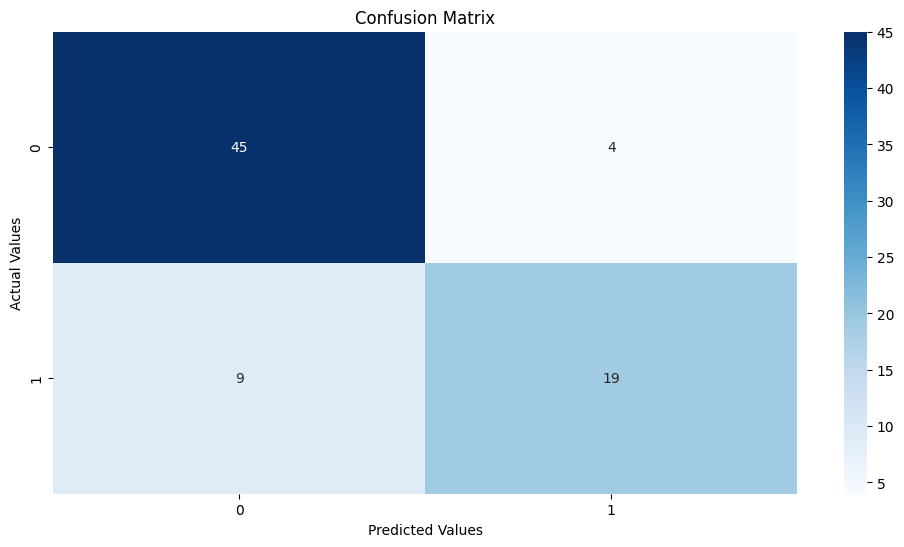

In [58]:
# plotting the confusion matrix
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

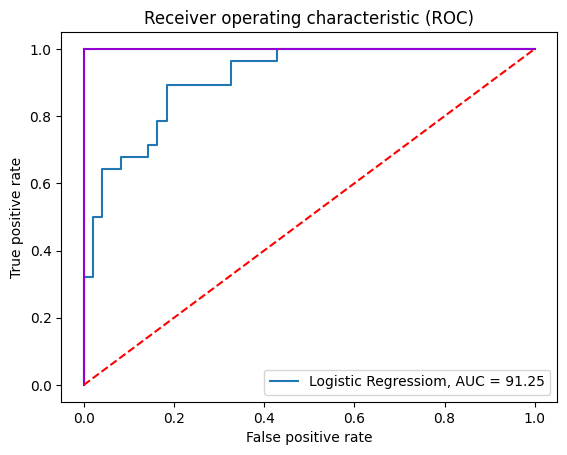

In [59]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Logistic Regressiom, AUC = " + str(round(auc*100,2)))
plt.plot([0,0], [0,1], color = "darkviolet") # ideal curve
plt.plot([0,1], [1,1], color = "darkviolet") # ideal curve 
plt.plot([0, 1], [0, 1],'r--') # random classification
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic (ROC)")
plt.show()